In [1]:
# Make Jupyter Notebook full screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DATA_PATH = '/Users/megantabbutt/BRT_data/GeoData/'
DATA_PATH_Dems = '/Users/megantabbutt/BRT_data/DemographicData/'

In [4]:
df = geopandas.read_file(DATA_PATH+"tl_2018_55_bg.shp")

In [5]:
df_dane = df[df['COUNTYFP'] == "025"]
df_dane

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
570,55,025,002000,1,550250020001,Block Group 1,G5030,S,607897,1617,+43.1040466,-089.3349658,"POLYGON ((-89.34179 43.10456, -89.34163 43.104..."
577,55,025,001300,1,550250013001,Block Group 1,G5030,S,1070101,503,+43.0541194,-089.3889560,"POLYGON ((-89.40006 43.05842, -89.39907 43.058..."
578,55,025,001401,1,550250014011,Block Group 1,G5030,S,2579158,42576,+43.0468061,-089.3795062,"POLYGON ((-89.39403 43.04175, -89.39313 43.041..."
579,55,025,001401,2,550250014012,Block Group 2,G5030,S,373021,0,+43.0366111,-089.4001153,"POLYGON ((-89.40664 43.03478, -89.40643 43.035..."
580,55,025,001401,3,550250014013,Block Group 3,G5030,S,901006,7983,+43.0435985,-089.3990727,"POLYGON ((-89.40397 43.03872, -89.40396 43.038..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4484,55,025,001101,1,550250011011,Block Group 1,G5030,S,249415,0,+43.0705410,-089.4032758,"POLYGON ((-89.40603 43.07334, -89.40533 43.073..."
4485,55,025,001102,2,550250011022,Block Group 2,G5030,S,818204,3186,+43.0758190,-089.4142757,"POLYGON ((-89.42512 43.07574, -89.42511 43.075..."
4486,55,025,001604,3,550250016043,Block Group 3,G5030,S,69099,0,+43.0754186,-089.3936677,"POLYGON ((-89.39733 43.07580, -89.39536 43.075..."
4487,55,025,001603,2,550250016032,Block Group 2,G5030,S,72927,0,+43.0726171,-089.3972200,"POLYGON ((-89.40069 43.07219, -89.40063 43.072..."


<AxesSubplot:>

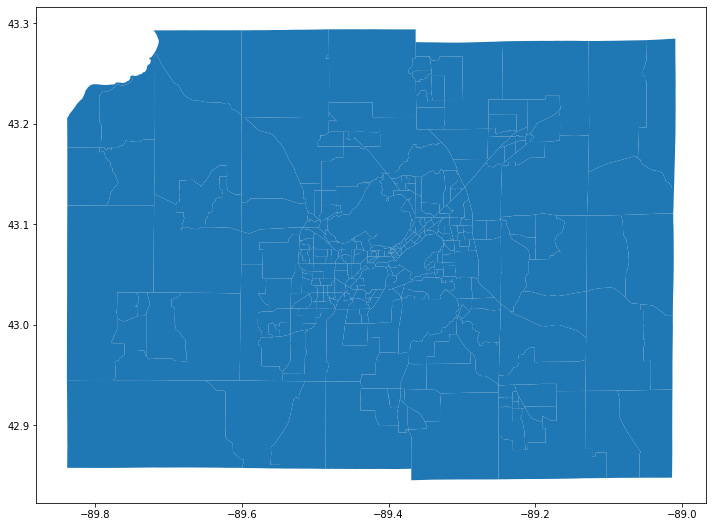

In [6]:
df_dane.plot(figsize=(12, 12))

In [7]:
df_mad = pd.read_csv(DATA_PATH_Dems + "Block_level_2018.txt", sep='\t')
df_mad

,GEOID,Total,TotalInLaborForce,AggEarningsPast12MoInflationAdj,TotalBusToWork,TotalCarToWork
0,550250121001,543,413,21188300,0,355
1,550250127002,1482,1021,70886200,0,903
2,550250121002,690,526,27841100,0,446
3,550250032001,2093,1423,59331400,893,286
4,550250014021,1184,867,39226400,0,653
...,...,...,...,...,...,...
305,550250016051,1809,1444,42669400,212,582
306,550250016062,2238,1946,39097700,342,693
307,550250017041,1617,972,62807100,84,437
308,550250017052,1348,1253,47400500,234,475


In [8]:
GeoID_mad = [str(i) for i in list(df_mad['GEOID'])]
print(len(GeoID_mad), GeoID_mad[:5])

GeoID_dane = [i for i in list(df_dane['GEOID'])]
print(len(GeoID_dane), GeoID_dane[:5])

310 ['550250121001', '550250127002', '550250121002', '550250032001', '550250014021']
310 ['550250020001', '550250013001', '550250014011', '550250014012', '550250014013']


In [9]:
mad_dane_bool = []
for ID in GeoID_dane:
    if ID in GeoID_mad:
        mad_dane_bool.append(True)
    else:
        mad_dane_bool.append(False)

In [10]:
print("GTFS data sets: ")
GTFS_DATA_PATH = "mmt_gtfs/"
#import os; os.listdir(GTFS_DATA_PATH) # Peak whats in the directory 

GTFS data sets: 


In [11]:
def getPandasDFCSV(path, file, sep=','):  
    """ Keyword Arg sep: deliminator used in txt file (default = ',')"""
    pandasDF = pd.read_csv(path +  file, sep=sep)
    return pandasDF

In [12]:
stops_df = getPandasDFCSV(GTFS_DATA_PATH, 'stops.txt')
stops_df.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,agency_id,jurisdiction_id,location_type,parent_station,relative_position,cardinal_direction,wheelchair_boarding,primary_street,address_range,cross_location
0,1110,1110,E Dayton & Wisconsin (WB),This EVENT/DETOUR ONLY stop (#1110) is westbou...,43.076428,-89.385920,MMT,CMAD,0,NaN,3,270.0,1,E Dayton,2,Wisconsin
1,1111,1111,W Doty & M L K Junior (EB),This EVENT/DETOUR ONLY stop (#1111) is eastbou...,43.072938,-89.382354,MMT,CMAD,0,NaN,3,90.0,1,W Doty,1,M L K Junior
2,1124,1124,S Fairchild & W Main (SB),This EVENT/DETOUR ONLY stop (#1124) is southbo...,43.072467,-89.385273,MMT,CMAD,0,NaN,3,180.0,1,S Fairchild,98,W Main
3,1135,1135,N Webster & E Mifflin (NB),This EVENT/DETOUR ONLY stop (#1135) is northbo...,43.077272,-89.383413,MMT,CMAD,0,NaN,1,0.0,1,N Webster,101,E Mifflin
4,1140,1140,E Washington & N Webster (WB),This EVENT/DETOUR ONLY stop (#1140) is westbou...,43.076390,-89.381930,MMT,CMAD,0,NaN,3,270.0,1,E Washington,200,N Webster


In [13]:
df_mad['TotalBusToWork']

busToWorkPercentage = [i/sum(list(df_mad['TotalBusToWork'])) for i in list(df_mad['TotalBusToWork'])]

In [14]:
# Creat own dataframe
   
GEOIDS = GeoID_dane

densityPercentage = []
for ID in GEOIDS:
    densityPercentage.append(int(df_mad[df_mad['GEOID'] == int(ID)]['Total'])/sum(list(df_mad['Total'])))

#densityPercentage

In [15]:
df_dane['densityPercentage'] = densityPercentage
df_dane

/Users/megantabbutt/Library/Python/3.8/lib/python/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,densityPercentage
570,55,025,002000,1,550250020001,Block Group 1,G5030,S,607897,1617,+43.1040466,-089.3349658,"POLYGON ((-89.34179 43.10456, -89.34163 43.104...",0.001982
577,55,025,001300,1,550250013001,Block Group 1,G5030,S,1070101,503,+43.0541194,-089.3889560,"POLYGON ((-89.40006 43.05842, -89.39907 43.058...",0.003610
578,55,025,001401,1,550250014011,Block Group 1,G5030,S,2579158,42576,+43.0468061,-089.3795062,"POLYGON ((-89.39403 43.04175, -89.39313 43.041...",0.004318
579,55,025,001401,2,550250014012,Block Group 2,G5030,S,373021,0,+43.0366111,-089.4001153,"POLYGON ((-89.40664 43.03478, -89.40643 43.035...",0.002061
580,55,025,001401,3,550250014013,Block Group 3,G5030,S,901006,7983,+43.0435985,-089.3990727,"POLYGON ((-89.40397 43.03872, -89.40396 43.038...",0.003855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4484,55,025,001101,1,550250011011,Block Group 1,G5030,S,249415,0,+43.0705410,-089.4032758,"POLYGON ((-89.40603 43.07334, -89.40533 43.073...",0.005543
4485,55,025,001102,2,550250011022,Block Group 2,G5030,S,818204,3186,+43.0758190,-089.4142757,"POLYGON ((-89.42512 43.07574, -89.42511 43.075...",0.006406
4486,55,025,001604,3,550250016043,Block Group 3,G5030,S,69099,0,+43.0754186,-089.3936677,"POLYGON ((-89.39733 43.07580, -89.39536 43.075...",0.004249
4487,55,025,001603,2,550250016032,Block Group 2,G5030,S,72927,0,+43.0726171,-089.3972200,"POLYGON ((-89.40069 43.07219, -89.40063 43.072...",0.004633


In [16]:
latitudes = list(stops_df["stop_lat"])
longitudes = list(stops_df["stop_lon"])

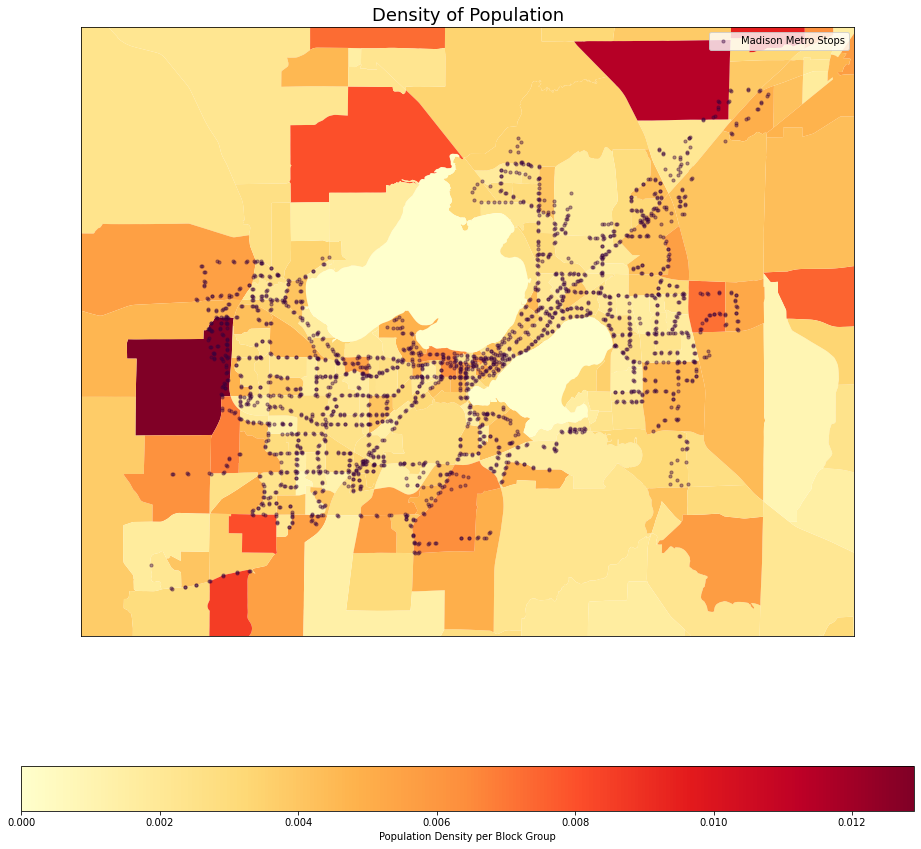

In [17]:

ax = plt.subplots(figsize=(16, 16), frameon=False)[1]


df_dane.plot(column='densityPercentage', ax=ax, zorder=1, legend=True, legend_kwds={'label': "Population Density per Block Group", 'orientation': "horizontal"}, cmap='YlOrRd')
ax.scatter(longitudes, latitudes, s=10, c='#36013f', marker='o', alpha=.4, zorder=2, label = "Madison Metro Stops")

plt.xlim(-89.6, -89.2)
plt.ylim(42.97, 43.2)
plt.yticks([])
plt.xticks([])

plt.legend()
plt.title("Density of Population", fontsize=18)
plt.show()